In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.animation import FuncAnimation
import time
import matplotlib.animation as animation
import seaborn as sns
import pandas as pd
from graphics import *
import sys
import random
import math

The purpose of this project is to simulate long-term motion of a body around a point mass accounting for relativistic effects. Objects in a stable orbit with a low parigee should appear to have a "precessing" orbit around the mass.

In [2]:
def orbit(m1, x0, y0, vx0, vy0, Δt, tf):
    """
    This function takes in initial parameters for a fixed point mass and a free body in space and calculates the motion
    of the free body.
    
    INPUTS:
    m1 : The mass of the fixed point mass. (kg)
    x0 : The initial x-position of the free body. (m)
    y0 : The initial y-position of the free body. (m)
    vx0: The initial x-velocity of the free body. (m/s)
    vy0: The initial y-velocity of the free body. (m/s)
    Δt : The time increment between data points. (s)
    tf : The total amount of time processed. (s)
    
    OUTPUTS:
    x : The data set of x-positions. (m)
    y : The data set of y-positions. (m)
    Δt: The time step. (s)
    t : The data set of times for each data point. (s)
    r : The data set of radius (distance between the free body and point mass). (m)
    """
    
    G = 6.67408*(10**-11) #Gravitational constant
    c = 299792458 #Speed of light
    Gm = G*m1
    
    t = np.arange(0, tf, Δt) #Define points in time
    
    r = [ math.sqrt(x0**2 + y0**2) ] #Create radius array with initial value
    
    a = [ -1 * Gm / (r[0]**2) ] #Create acceleration array with initial value
    ax = [ (x0/r[0]) * a[0] ] #Create x-acceleration array with initial value
    ay = [ (y0/r[0]) * a[0] ] #Create y-acceleration array with initial value
    
    vx = [ vx0 ] #Create x-velocity array with initial value
    vy = [ vy0 ] #Create y-velocity array with initial value
    v = [ math.sqrt(vx[0]**2 + vy[0]**2) ] #Create velocity array with initial value
    
    x = [ x0 ] #Create x-position array with initial value
    y = [ y0 ] #Create y-position array with initial value
    
    time = [  Δt*math.sqrt(1 - 2*Gm/(r[0]*(c**2)))  ] #Create variable time-step array with initial value
    
    
    for i in range(1, len(t)): #Loop from the 2nd time point to the last
        
        dt = time[-1] #Set this iteration's time step to the previously calculated time step
        
        k1x = vx[-1]*dt + (1/2)*ax[-1]*(dt**2) #
        k1y = vy[-1]*dt + (1/2)*ay[-1]*(dt**2) #Calculate the estimated change in x and y from the startpoint of the interval
        
        k1vx = ax[-1]*dt #
        k1vy = ay[-1]*dt #Calculate the estimated change in x-velocity and y-velocity from the startpoint of the interval
        
        newx = x[-1] + k1x #
        newy = y[-1] + k1y #Calculate the new estimated x and y position from the startpoint estimate changes
        
        newr = math.sqrt(newx**2 + newy**2) #Calculate the new radius from the startpoint estimate new position
        newa = (-1) * Gm / (newr**2) #Calculate the new acceleration from the startpoint estimate new radius
        newax = (newx/newr)*newa #
        neway = (newy/newr)*newa #Calculate the new x and y components of acceleration from the startpoint estimate new position
        
        newvx = vx[-1] + k1vx #
        newvy = vy[-1] + k1vy #Calculate the new estimated x and y velocity from the startpoint estimate changes
        
        k2vx = newax*dt #
        k2vy = neway*dt #Calculate the new estimated change in x and y velocity from the estimated endpoint of the interval
        
        k2x = newvx*dt + (1/2)*newax*(dt**2) #Calculate the new estimated change in x and y from the estimated endpoint of the
        k2y = newvy*dt + (1/2)*neway*(dt**2) #interval
        
        
        
        x.append(   x[-1] + 0.5*(k1x + k2x)   ) #Add the new position values of x and y by averaging the startpoint and
        y.append(   y[-1] + 0.5*(k1y + k2y)   ) #endpoint estimates
        
        vx.append(   vx[-1] + 1*(k1vx)   ) #
        vy.append(   vy[-1] + 1*(k1vy)   ) #Repeat for x and y velocity
        v.append(   math.sqrt( vx[-1]**2 + vy[-1]**2 )   ) #Calculate new velocity
        
        r.append(   math.sqrt( (x[-1]**2) + (y[-1]**2) )   ) #Calculate new radius
        
        a.append(   -1 * Gm / (r[-1]**2)   ) #Calculate new acceleration
        ax.append(   (x[-1]/r[-1]) * a[-1]   ) #
        ay.append(   (y[-1]/r[-1]) * a[-1]   ) #Calculate new x and y acceleration
        
        time.append(   Δt*math.sqrt(1 - 2*Gm/(r[-1]*(c**2)))   ) #Estimate new time step
        
    
    
    return x,y,Δt,t,r

In [10]:
def plot(func, m1, x0, y0, vx0, vy0, Δt, tf):
    """
    This function plots the entirety of the data.
    
    INPUTS:
    func: The function to acquire the data from.
    m1  : The mass of the fixed point mass. (kg)
    x0  : The initial x-position of the free body. (m)
    y0  : The initial y-position of the free body. (m)
    vx0 : The initial x-velocity of the free body. (m/s)
    vy0 : The initial y-velocity of the free body. (m/s)
    Δt  : The time increment between data points. (s)
    tf  : The total amount of time processed. (s)
    
    RETURNS:
    None. Plots positional data.
    """
    
    x,y,Δt,t,r = func(m1, x0, y0, vx0, vy0, Δt, tf)
    
    fig7, axe7 = plt.subplots()
    axe7.plot(t, r, "RED")
    axe7.set_title("t, r")
    
    fig, axe = plt.subplots()
    axe.plot(x, y, "RED")
    axe.set_title("x, y")
    plt.axis('equal')
    plt.axhline(0, 0, 1)
    plt.axvline(0, 0, 1)

In [4]:
def play(func, m1, x0, y0, vx0, vy0, Δt, tf, interval, inc):
    """
    This function animates the motion of an object from data sets.
    
    INPUTS:
    func    : The function to acquire the data from.
    m1      : The mass of the fixed point mass. (kg)
    x0      : The initial x-position of the free body. (m)
    y0      : The initial y-position of the free body. (m)
    vx0     : The initial x-velocity of the free body. (m/s)
    vy0     : The initial y-velocity of the free body. (m/s)
    Δt      : The time increment between data points. (s)
    tf      : The total amount of time processed. (s)
    interval: The amount of time between each frame (redundant if very small). (s)
    inc     : The amount of data point skipped each frame. More effective at adjusting the speed of the animation.
    
    RETURNS:
    None. Creates a graphics window animation of motion data.
    """
    
    x,y,Δt,t,r = func(m1, x0, y0, vx0, vy0, Δt, tf)

    WindowSize = 800
    WindowOffset = 30
    MarkerSize = .5
    windowWidth = WindowSize + WindowOffset * 2
    windowHeight = WindowSize + WindowOffset * 2
    windowTitle = "Orbital Trajectory Plot"
    win = GraphWin(windowTitle, windowWidth, windowHeight)#create the top left and bottom right points for this rectangle
    win.setBackground("White")
    topLeftPoint = Point(WindowOffset, WindowOffset)
    bottomRightPoint = Point(WindowSize + WindowOffset, WindowSize + WindowOffset)

    r = Rectangle(topLeftPoint, bottomRightPoint)    # instantiate a Rectangle object

    r.draw(win)         # draw the object to the window
    win.setBackground("black")

    xCoord = ( WindowSize / 2 ) + WindowOffset
    yCoord = ( WindowSize / 2 ) + WindowOffset
    p = Point(xCoord, yCoord)
    
    
    if (max(x) > min(x)):
        maxim = max(x)
    else:
        maxim = min(x)
    if (max(y) > maxim):
        maxim = max(y)
    if (min(y) > maxim):
        maxim = min(y)
    
    
    i = 0

    while  win.checkKey() == "":
        
        if (i == 0):
            sun = Circle( Point((1/2)*WindowSize + WindowOffset, (1/2)*WindowSize + WindowOffset), 2)
            sun.setFill("red")
            sun.setOutline("red")
            sun.draw(win)
        
        xpt1 = (x[i]*((WindowSize)/2)/maxim) + (1/2)*WindowSize + WindowOffset
        ypt1 = (y[i]*((WindowSize)/2)/maxim) + (1/2)*WindowSize + WindowOffset
        
        xpt2 = (x[i+inc]*((WindowSize)/2)/maxim) + (1/2)*WindowSize + WindowOffset
        ypt2 = (y[i+inc]*((WindowSize)/2)/maxim) + (1/2)*WindowSize + WindowOffset
        
        if (i>0):
            pt.undraw()
        
        point1 = Point(xpt1, ypt1)
        point2 = Point(xpt2, ypt2)
        c = Line(point1, point2)
        c.setFill("blue")
        c.draw(win)
        
        d = c
        
        pt = Circle( Point(xpt2, ypt2), 2 )
        pt.setFill("yellow")
        pt.draw(win)
        
        i = i + inc

        key_num = random.SystemRandom(i)
        
        time.sleep(interval)
        
    while  win.checkKey() == "":
        pass

    win.close()         # Close window when done

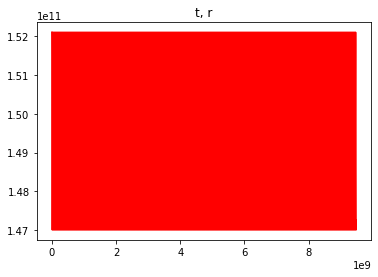

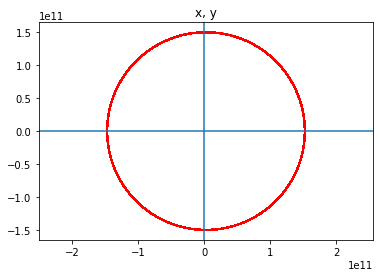

In [5]:
plot(orbit, 1.989*(10**(30)), 1.521*(10**11), 0, 0, 29290, 360, 300*3.16*(10**7)) #Earth (300 years, 360s time step)
#Plots the orbit of Earth over 300 years with 360 seconds between each data point. Startpoint is at Earth's apogee.

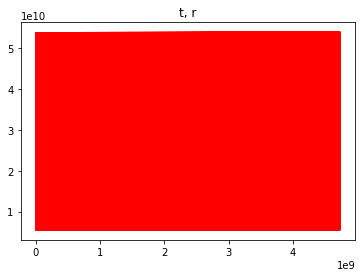

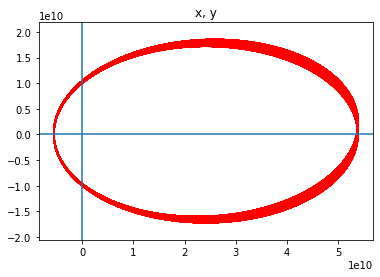

In [6]:
plot(orbit, 1.989*(10**(30)), 5.3802*(10**10), 0, 0, 2.14*(10**4), 250, 150*3.154*(10**7)) #High eccentricity planet (150 years, 250s time step)
#Plots the orbit of a body that comes very close to the sun over 150 years with 250 seconds between each data point. 
#Startpoint is an arbitrary apigee.

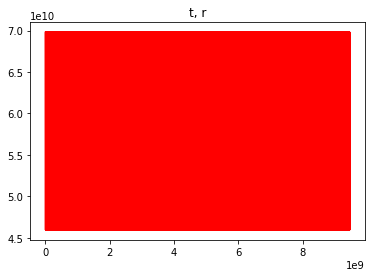

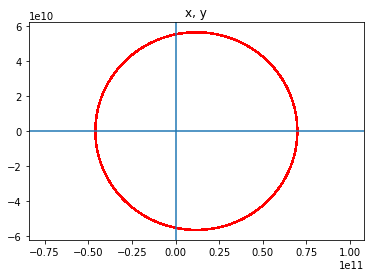

In [7]:
plot(orbit, 1.989*(10**(30)), 6.98*(10**10), 0, 0, 38860, 300, 300*3.154*(10**7)) #Mercury, 300 years (300s time step)
#Plots the orbit of Mercury over 300 years with 300 seconds between each data point. This appears to be too short of a time
#period to observe much precession.
#Startpoint is at Mercury's apogee.

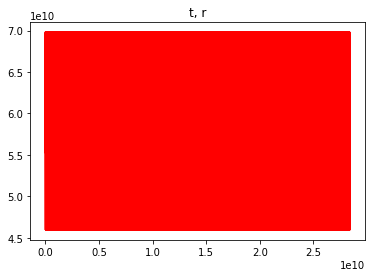

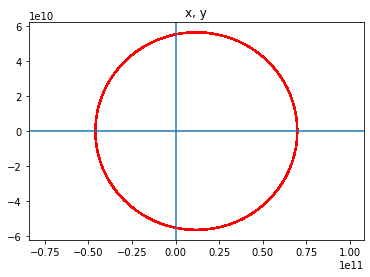

In [8]:
plot(orbit, 1.989*(10**(30)), 6.98*(10**10), 0, 0, 38860, 800, 900*3.154*(10**7)) #Mercury, 900 years (800s time step)
#Plots the orbit of Mercury over 900 years with 800 seconds between each data point. This also appears to be too short of a
#time period to display much precession. This seems to demonstrate that most of Mercury's precession is caused by the
#gravitational influence of other planets.
#Startpoint is at Mercury's apogee.

In [9]:
play(orbit, 1.989*(10**(30)), 5.3802*(10**10), 0, 0, 1.4*(10**4), 250, 15*3.154*(10**7), 0.001, 15) #High eccentricity planet (15 years, 250s time step)
#This plays an animation of the orbit of a body that comes very close to the sun over 15 years with 250 seconds between
#each data point. Startpoint is an arbitrary apogee.